# AllState Claims Severity

#### problem statement

The main objective of the problem statement is to predict the severity loss value of an insurance claim using machine learning Regression


#### Data Overview

The data is obtained from an Allstate insurance company which is an
US-based insurance company

There are two files:
    1.train.csv
    2.test.csv

The train dataset consists of 188318 datapoints and 130 features->116 are categeorical,14 are Real-valued features and loss feature which we wants to predict.

The test dataset has same features but no "loss" feature.

#### Performance Metric:

1.Mean Absolute Error

MAE is the average of difference between acutal value and predicted value 

It is robust to outliers.Since the dataset contains some outliers it will handle this outliers.MAE can be easily interpretable as it is simple and easy to calculate.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [5]:
#shape of the dataset
print(train_data.shape)#shape of train_data
print(test_data.shape)#shape of test_data

(188318, 132)
(125546, 131)


In [6]:
#checking the Null values
print((train_data.isnull().sum().sum()))#Null values for train_data
print((test_data.isnull().sum().sum()))#Null values for test_data

0
0


In [7]:
#seperating categorical and continuous features
def features(df):
    categorical_features=[]
    continuous_features=[]
    for i in df.columns:
        if i[:3]=='cat':
            categorical_features.append(i)
        elif i[:4]=='cont':
            continuous_features.append(i)
    return categorical_features,continuous_features

In [8]:
categorical_train_features,continuous_train_features=features(train_data)#seperating categorical and continuous for train data
categorical_test_features,continuous_test_features=features(test_data)#seperating categorical and continuous for test data

In [9]:
print(len(categorical_train_features))
print(len(continuous_train_features))
print(len(categorical_test_features))
print(len(continuous_test_features))

116
14
116
14


In [10]:
#counting how many unique values are there in a particulary categeory
#we can count by using value_counts() function
categeorical_unique_values =[]
for j in categorical_train_features:
    a=train_data[j].value_counts()
    categeorical_unique_values.append(len(a))

# 1.EDA

### categeorical features

#### seeing how many unique values are there in a categeory with the help of bar plot

In [11]:
def barplot(start,end):
    fig=plt.figure(figsize=(25,7))
    plt.bar(categorical_train_features[start:end],categeorical_unique_values[start:end])
    plt.xlabel('cat')
    plt.ylabel('No of unique_values')
    plt.title('unique values in a particular categeory')

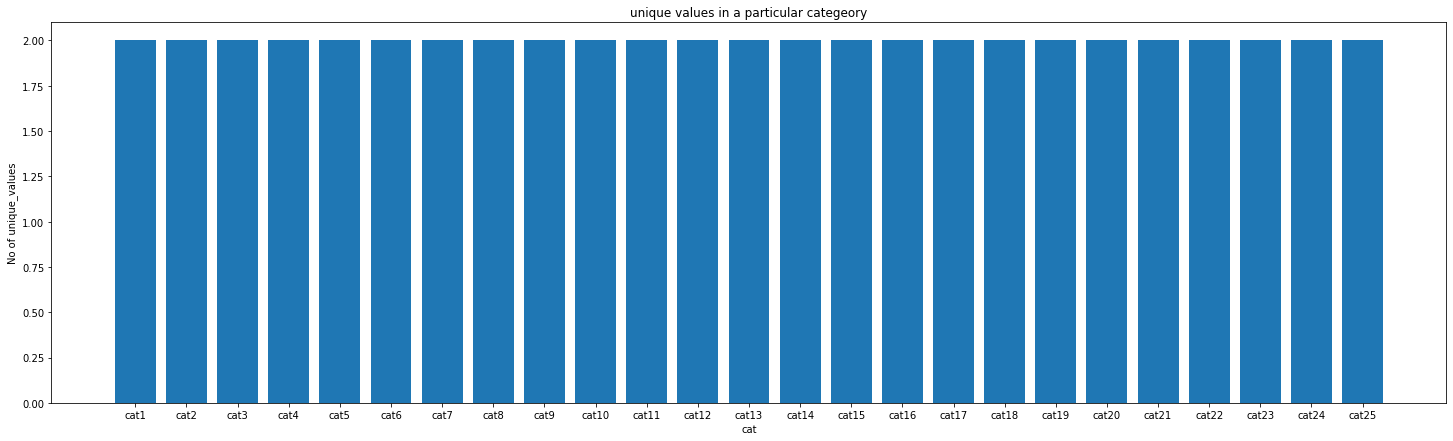

In [12]:
barplot(0,25)

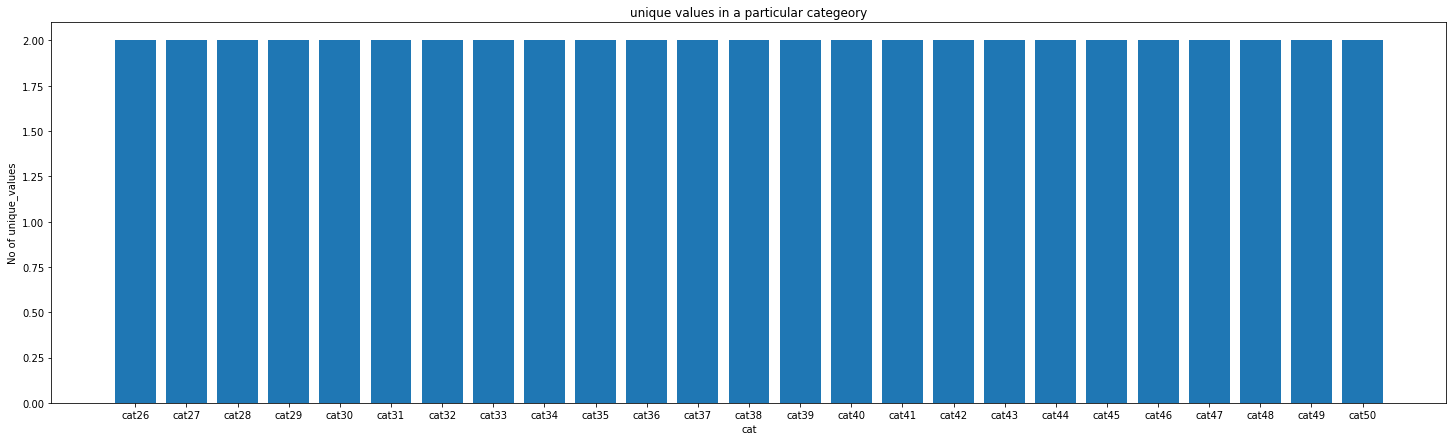

In [13]:
barplot(25,50)

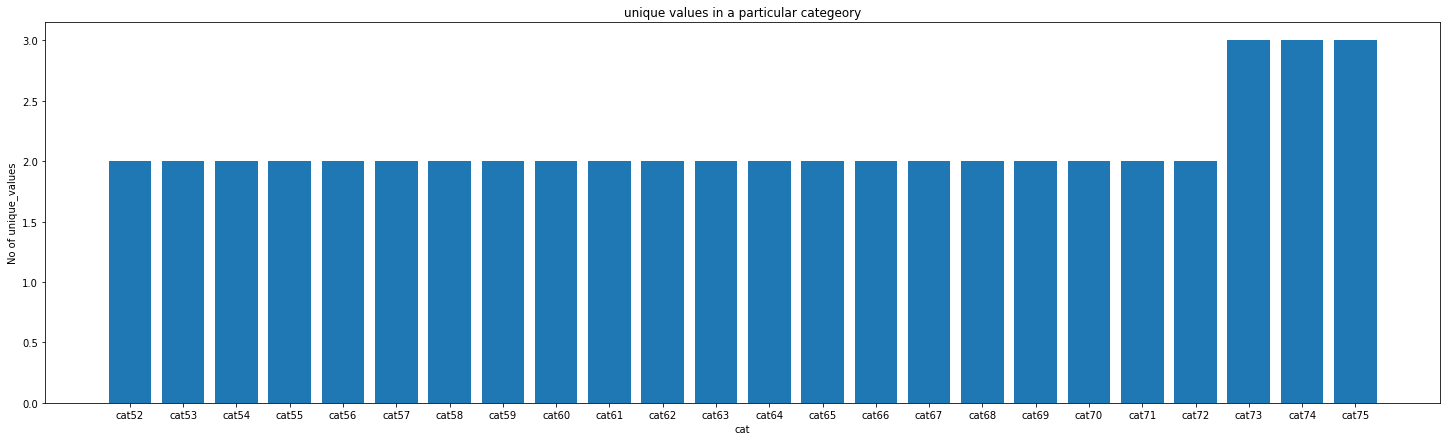

In [14]:
barplot(51,75)

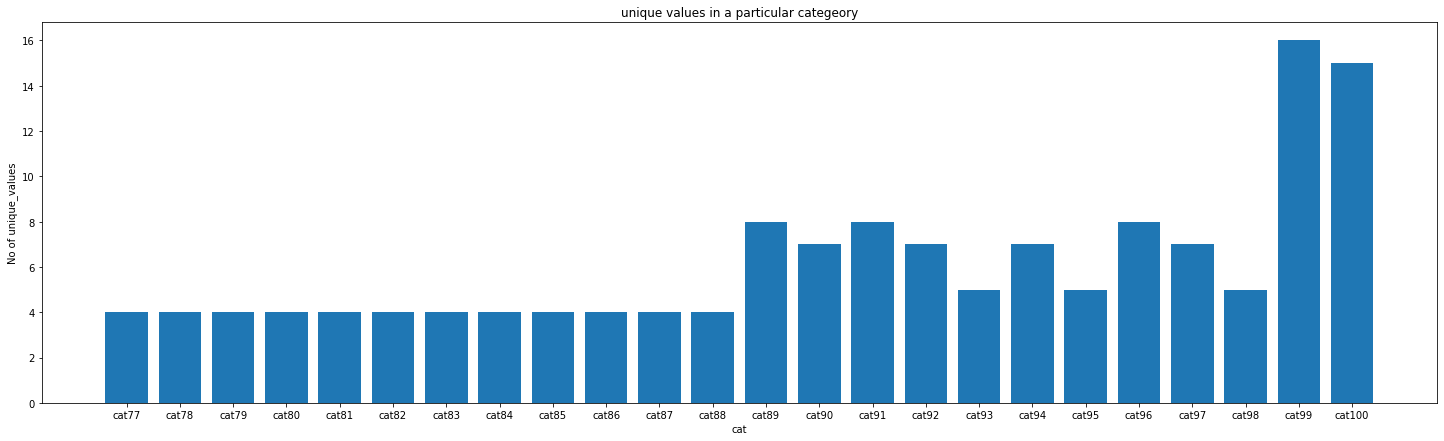

In [15]:
barplot(76,100)

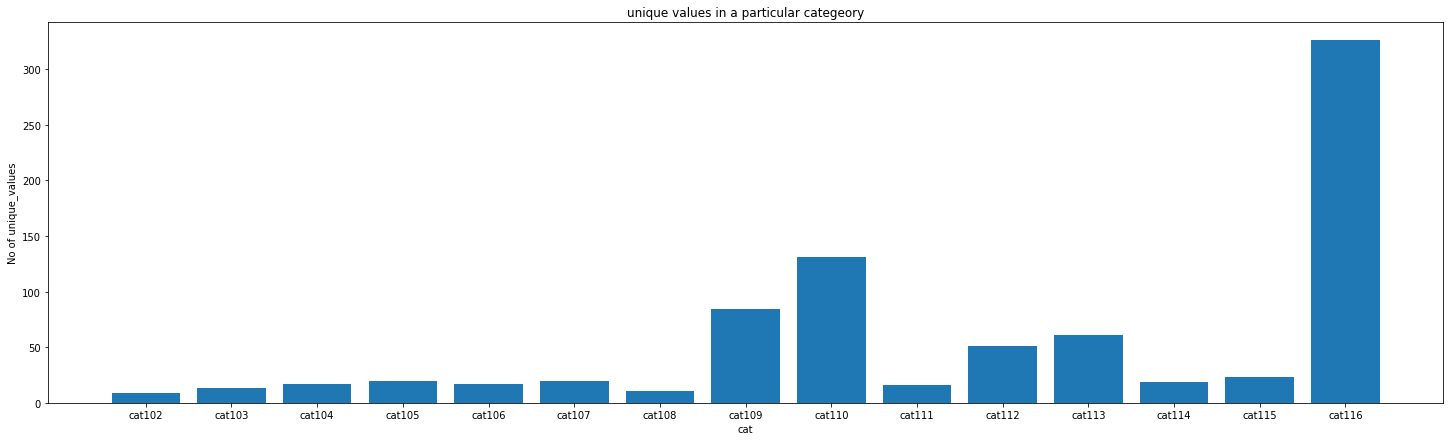

In [16]:
barplot(101,116)

#### observation

from the above plots we can observe that the most of the categeorical features have only 2 unique values

### Continuous features

#### univariate analysis on continuous features

#### a.distplot

In [19]:
#https://seaborn.pydata.org/generated/seaborn.distplot.html
def univariate_continuous_features(a,train,features):
    for k in range(0,len(features)):
        plt.figure(figsize=(10,5))
        a(train[features[k]])

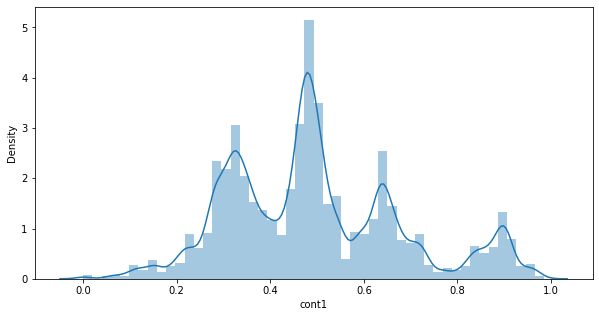

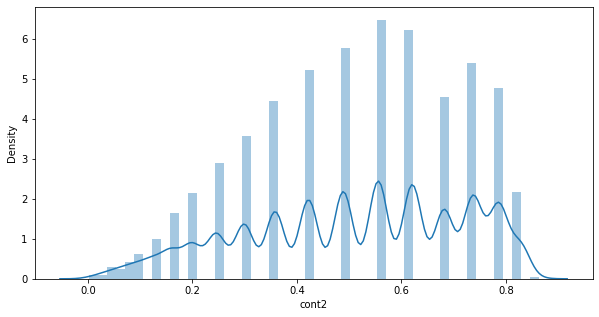

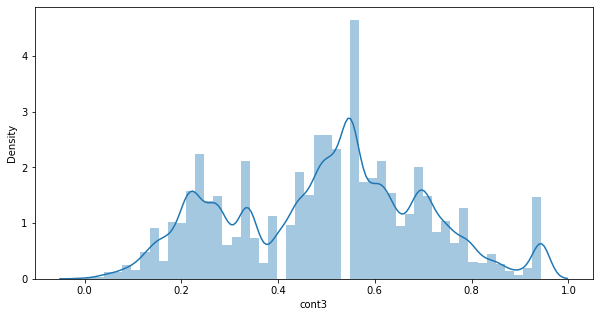

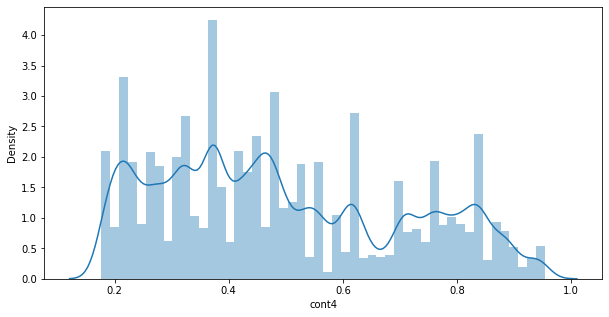

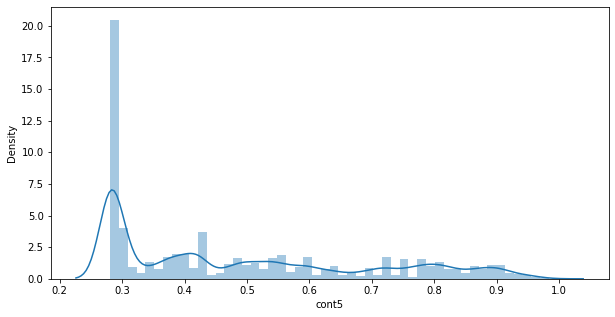

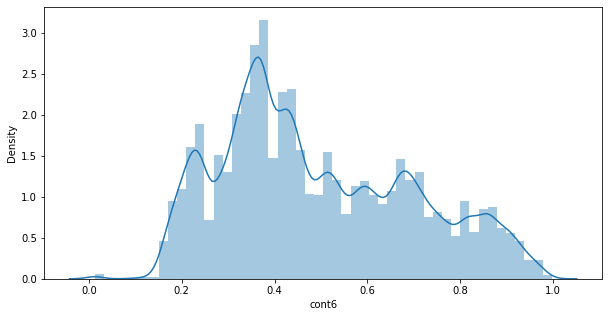

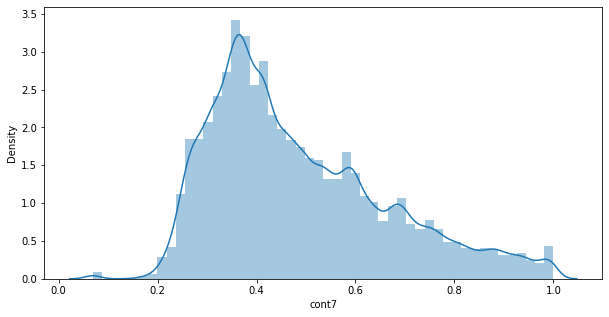

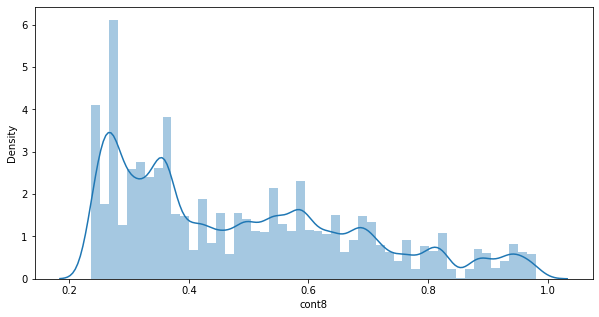

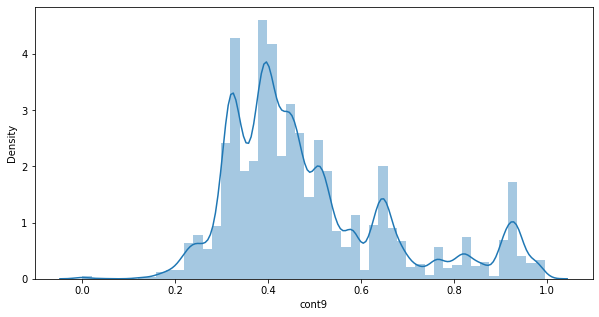

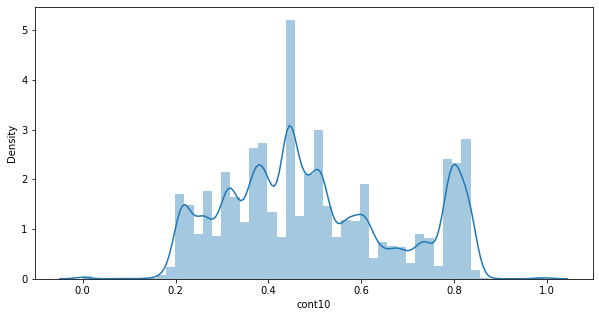

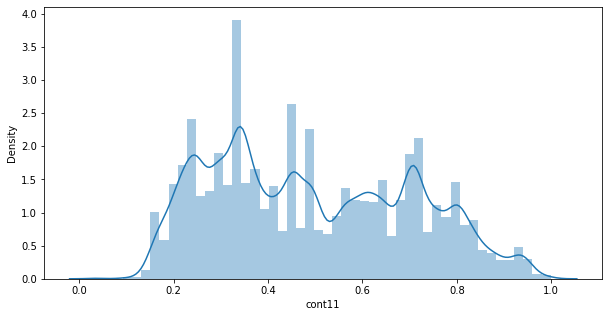

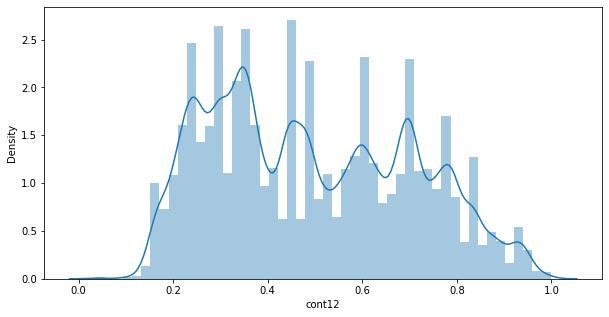

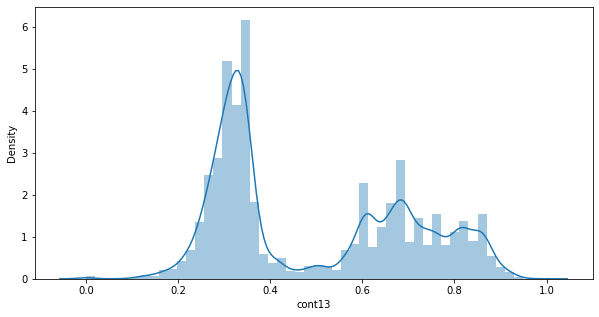

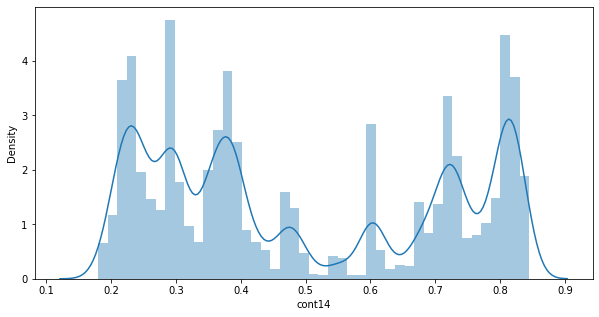

In [20]:
univariate_continuous_features(sns.distplot,train_data,continuous_train_features)

#### b.Boxplot

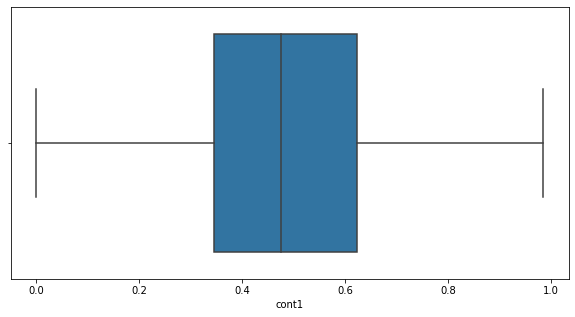

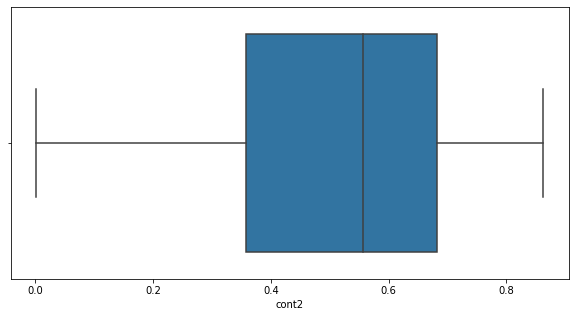

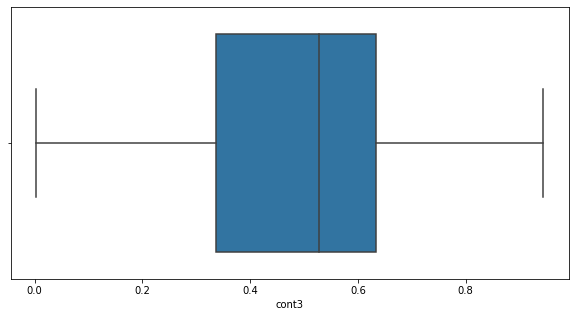

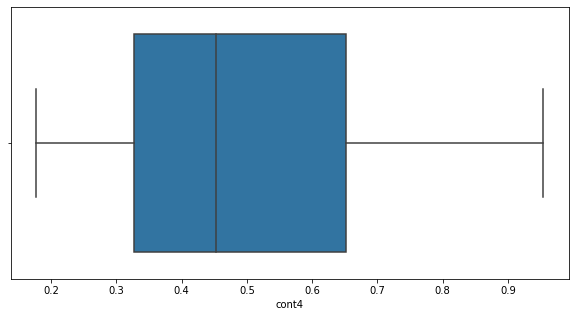

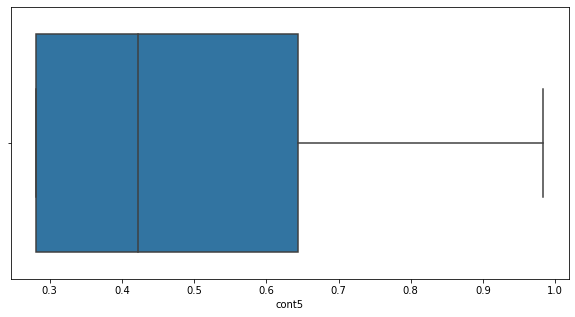

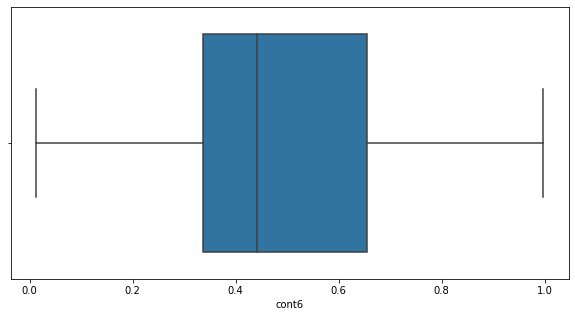

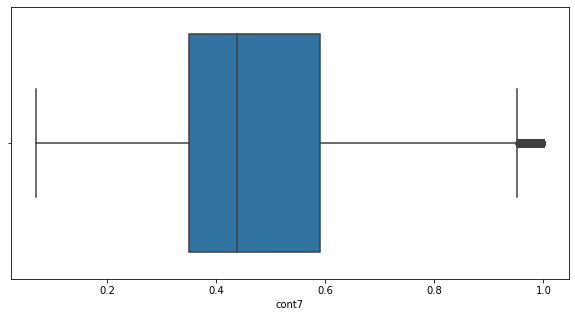

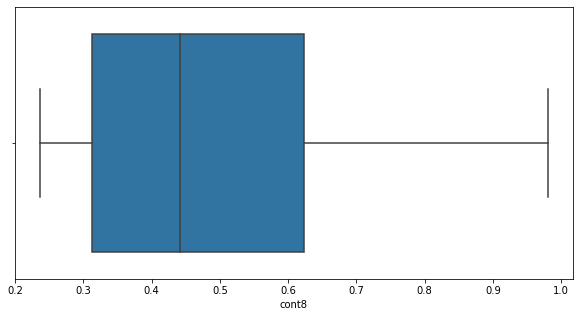

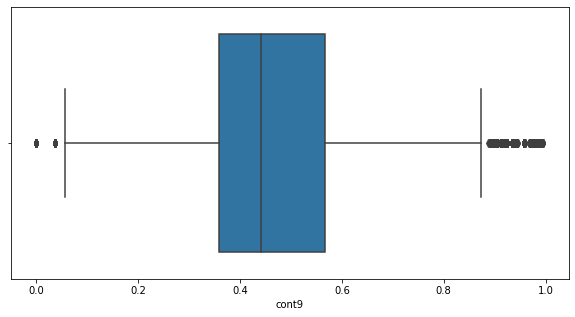

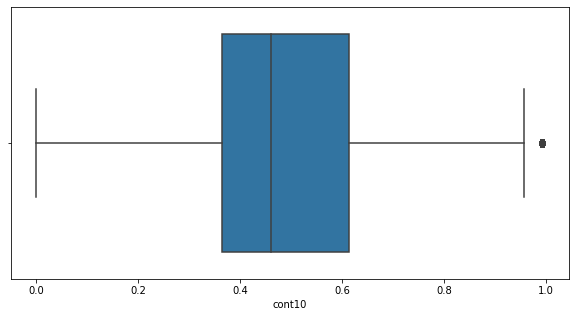

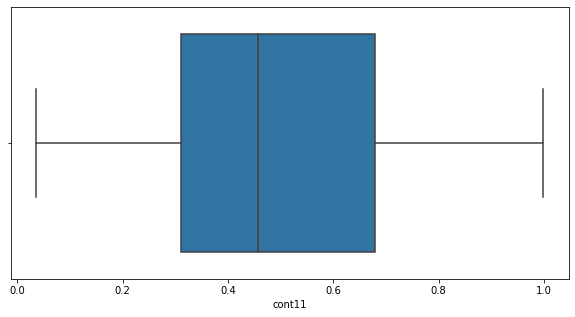

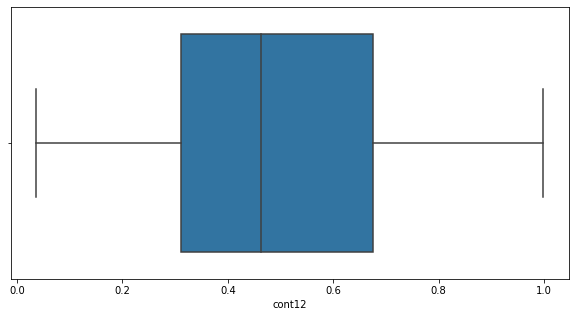

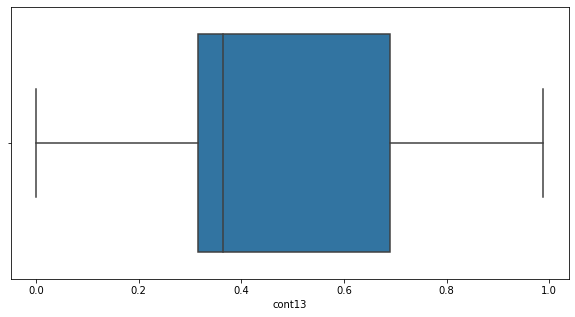

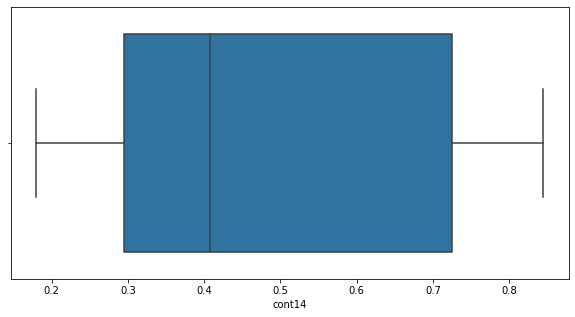

In [21]:
univariate_continuous_features(sns.boxplot,train_data,continuous_train_features)

#### observations:

From the above box plot we can see some outliers in cont7,cont9,cont10.

we can observe that the cont13,cont14 features have high variance

#### c.violin plot

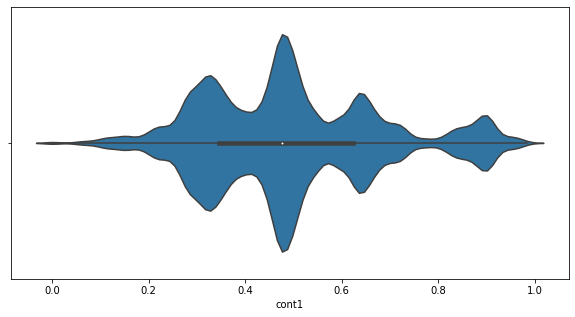

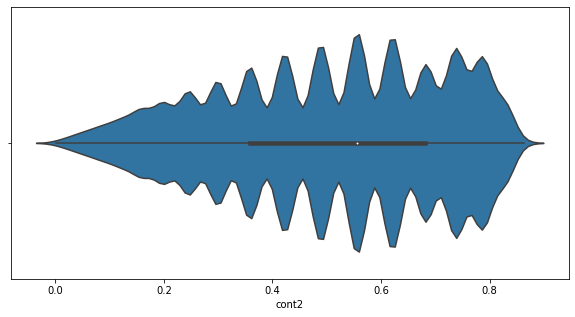

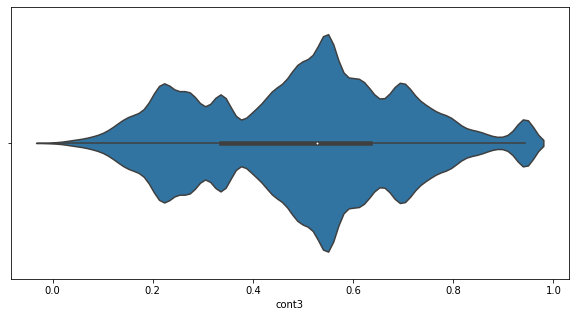

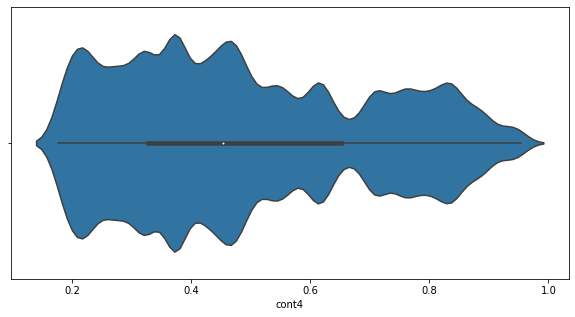

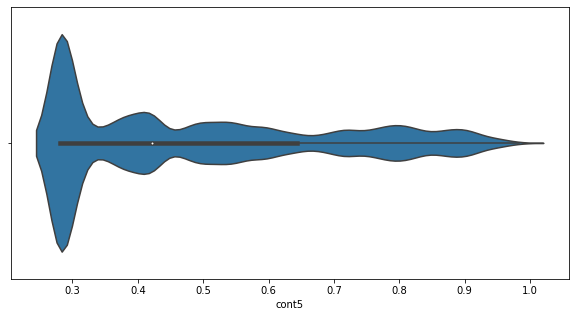

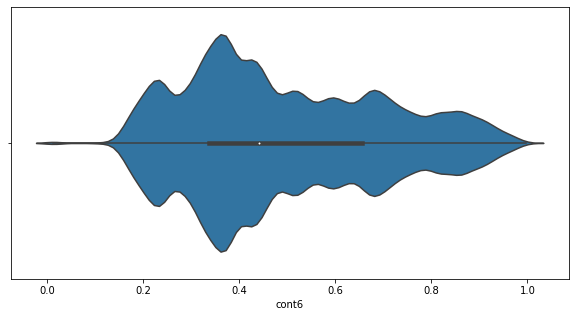

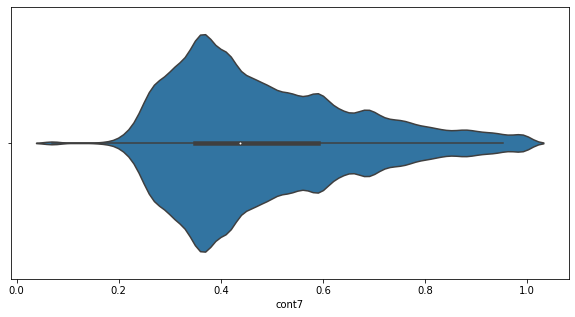

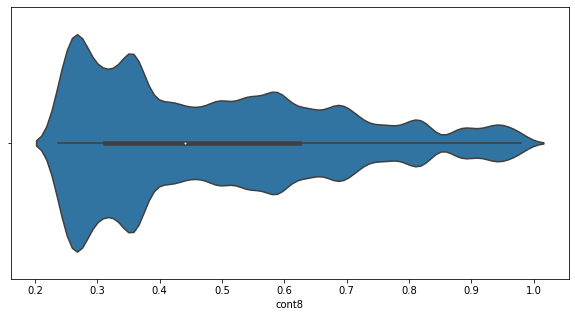

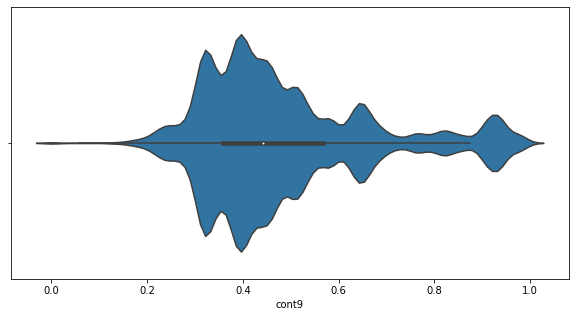

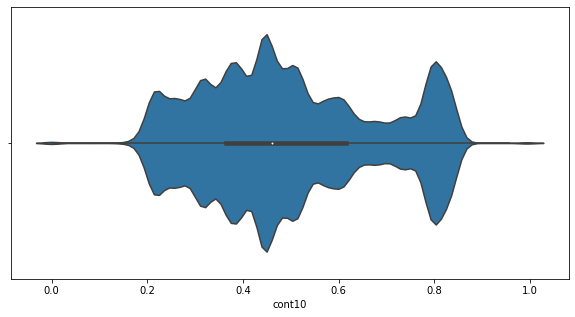

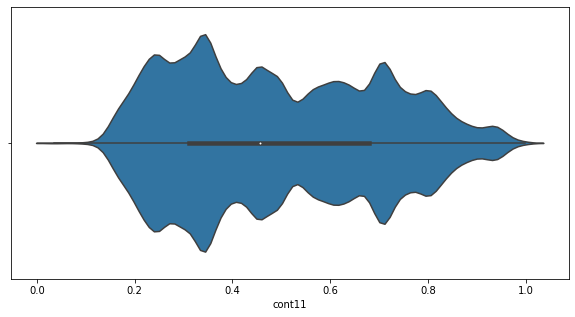

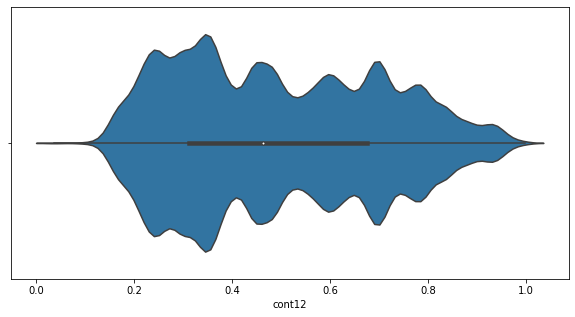

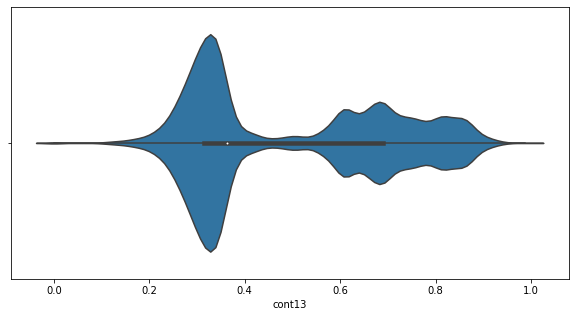

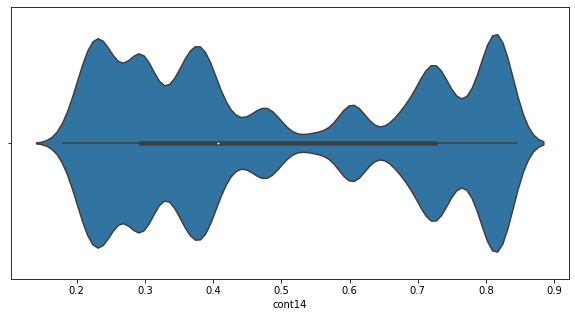

In [22]:
univariate_continuous_features(sns.violinplot,train_data,continuous_train_features)

#### applying polynomial transformations on continuous features

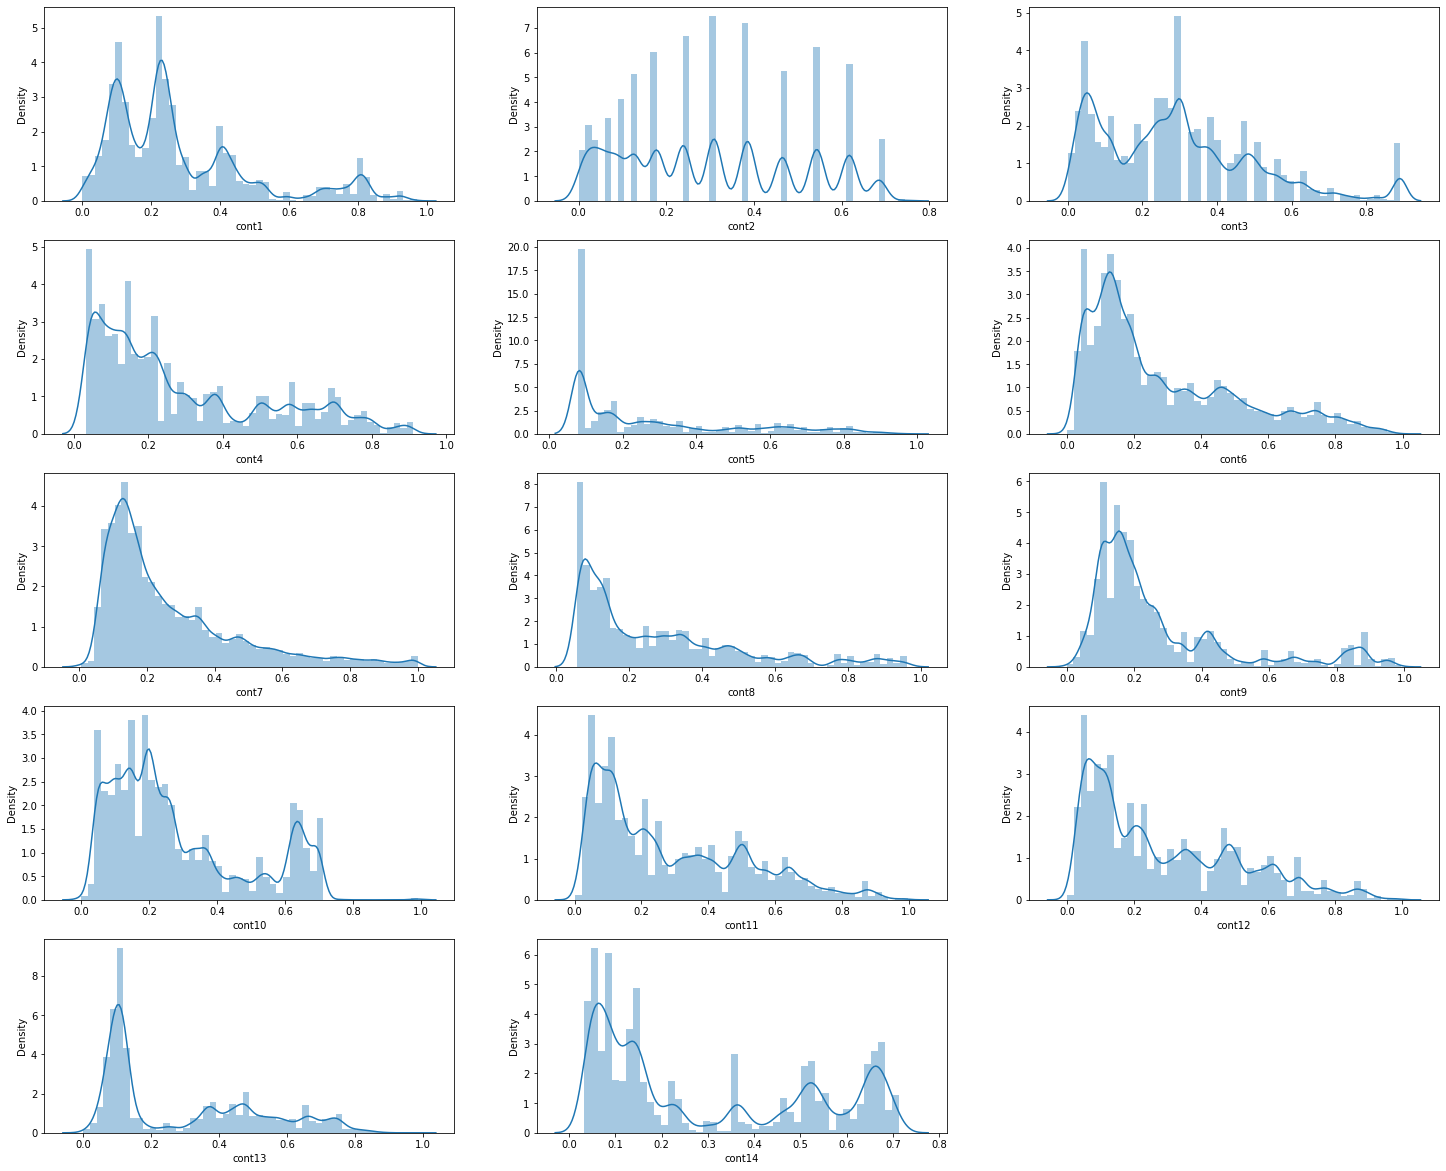

In [67]:
fig= plt.subplots(figsize=(25,25))
for m,n in enumerate(continuous_train_features):
    plt.subplot(6,3,m+1)
    sns.distplot(np.power(train_data[n],2))

#### observation:

from the above plots we can say that all the points lie in between 0 to 1.Here some feature distributions are very same for ex,cont11,cont12 distributions are same.we can drop any one of the feature.

## Loss feature Analysis

<AxesSubplot:xlabel='loss', ylabel='Density'>

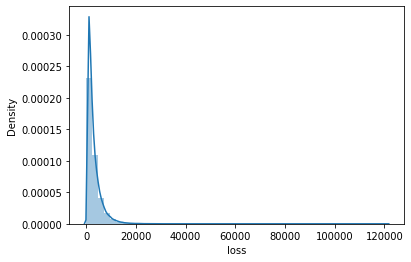

In [11]:
sns.distplot(train_data['loss'])

#### Observation

from above plot we can say that our loss variable follows log-normal distribution and the tail is towards the right so it follows right skewed distribution

To convert into Normal distribution we apply "log" to our loss feature 

#### a.log transformation to our loss feature

<AxesSubplot:xlabel='loss', ylabel='Density'>

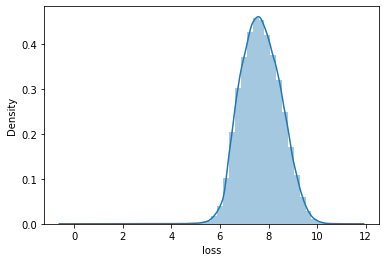

In [12]:
sns.distplot(np.log(train_data['loss']))

Now Loss feature also not Gaussian Distribution Lets give some shift to our loss feature

#### loss feature with shift

<AxesSubplot:xlabel='loss', ylabel='Density'>

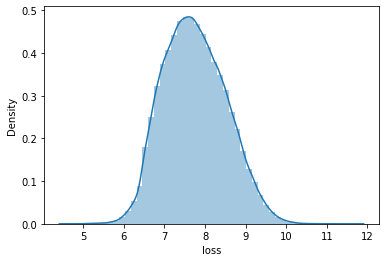

In [19]:
sns.distplot(np.log(train_data['loss']+100))

Now it is clear that distribution follows Normal distribution by giving some shift to our loss feature

#### bi-variate analysis on top selected features

In [31]:
#Doing Label Encoding to our Categeorical features
label_encoder=LabelEncoder()
for m in categorical_train_features:
    train_data[m]=label_encoder.fit_transform(train_data[m])

In [32]:
#Train and test split
Y=np.log(train_data['loss']+100)
X=train_data.drop(['loss','id'],axis = 1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [33]:
model=RandomForestRegressor(n_estimators=100,n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

([<matplotlib.axis.YTick at 0x16b0525c460>,
 [Text(0, 0, 'cat110'),
  Text(0, 1, 'cont1'),
  Text(0, 2, 'cat53'),
  Text(0, 3, 'cont4'),
  Text(0, 4, 'cont6'),
  Text(0, 5, 'cat81'),
  Text(0, 6, 'cont3'),
  Text(0, 7, 'cont5'),
  Text(0, 8, 'cont8'),
  Text(0, 9, 'cat112'),
  Text(0, 10, 'cat111'),
  Text(0, 11, 'cat100'),
  Text(0, 12, 'cat103'),
  Text(0, 13, 'cat12'),
  Text(0, 14, 'cat79'),
  Text(0, 15, 'cont2'),
  Text(0, 16, 'cat101'),
  Text(0, 17, 'cont7'),
  Text(0, 18, 'cont14'),
  Text(0, 19, 'cat80')])

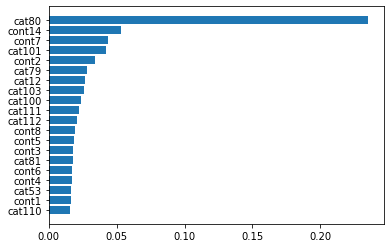

In [36]:
features_names=X_train.columns 
feature_importances=model.feature_importances_
indices=(np.argsort(feature_importances))[-20:]
plt.barh(range(len(indices)),feature_importances[indices]) 
plt.yticks(range(len(indices)),[features_names[i] for i in indices]) 

#### a.Categeorical features on univariate analysis

#### 1.Countplot

Text(0.5, 1.0, 'countplot for cat112')

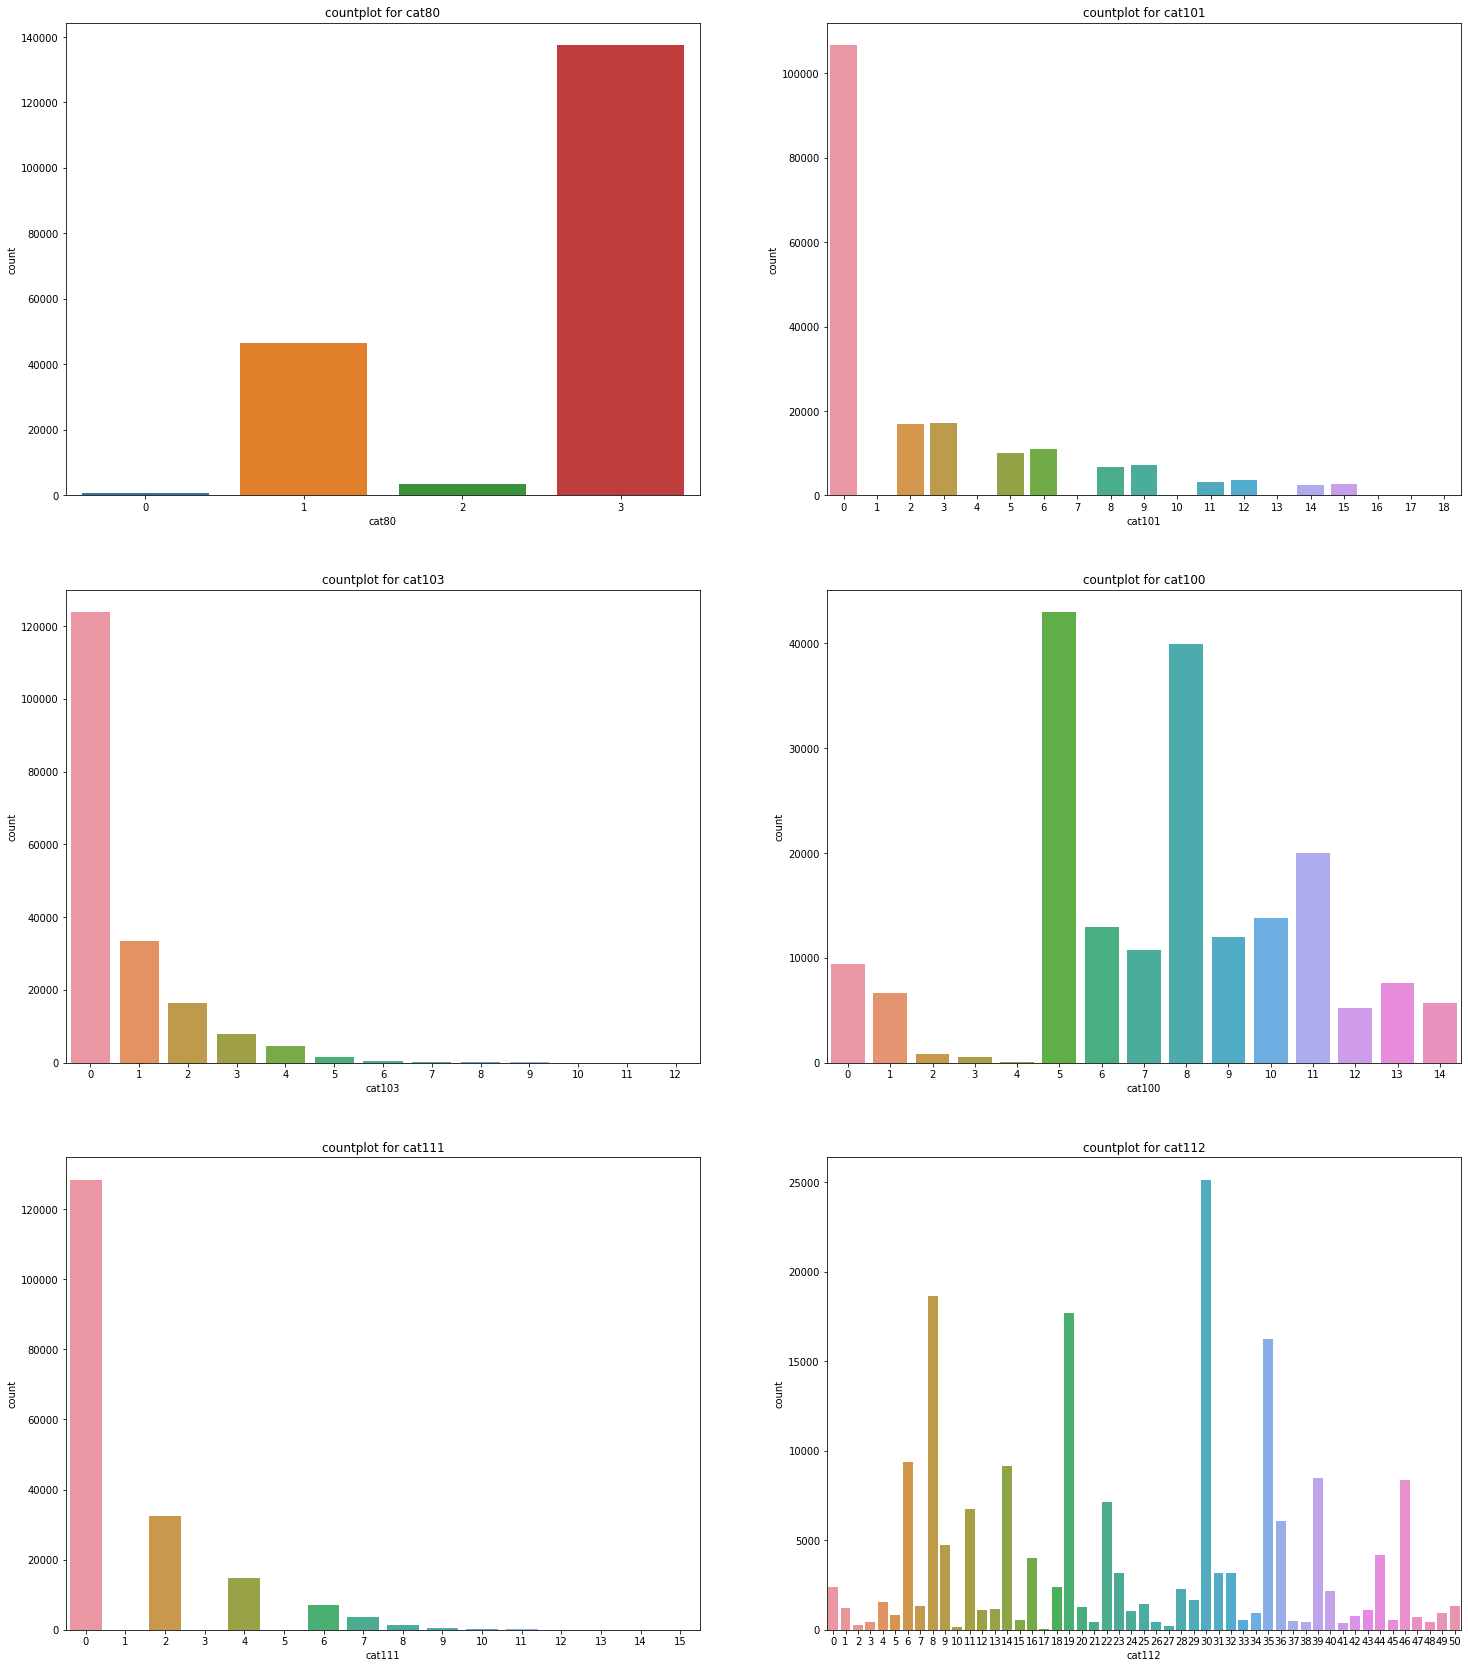

In [52]:
#CAT80
figure=plt.figure(figsize=(25,40))
axes1=figure.add_subplot(4,2,1) 
sns.countplot(data=train_data,x='cat80')
plt.title('countplot for cat80')
#CAT101
axes2=figure.add_subplot(4,2,2) 
sns.countplot(data=train_data,x='cat101')
plt.title('countplot for cat101')
#CAT103
axes3=figure.add_subplot(4,2,3) 
sns.countplot(data=train_data,x='cat103')
plt.title('countplot for cat103')
#CAT100
axes4=figure.add_subplot(4,2,4) 
sns.countplot(data=train_data,x='cat100')
plt.title('countplot for cat100')
#CAT111
axes5=figure.add_subplot(4,2,5) 
sns.countplot(data=train_data,x='cat111')
plt.title('countplot for cat111')
#CAT112
axes6=figure.add_subplot(4,2,6) 
sns.countplot(data=train_data,x='cat112')
plt.title('countplot for cat112')

#### observations:

we can say that some levels are very high and some levels are very rare means have only one level.

#### b.bivaraite analysis on catgeorical features

#### a.BoxPlot

Text(0.5, 1.0, 'boxplot for cat112')

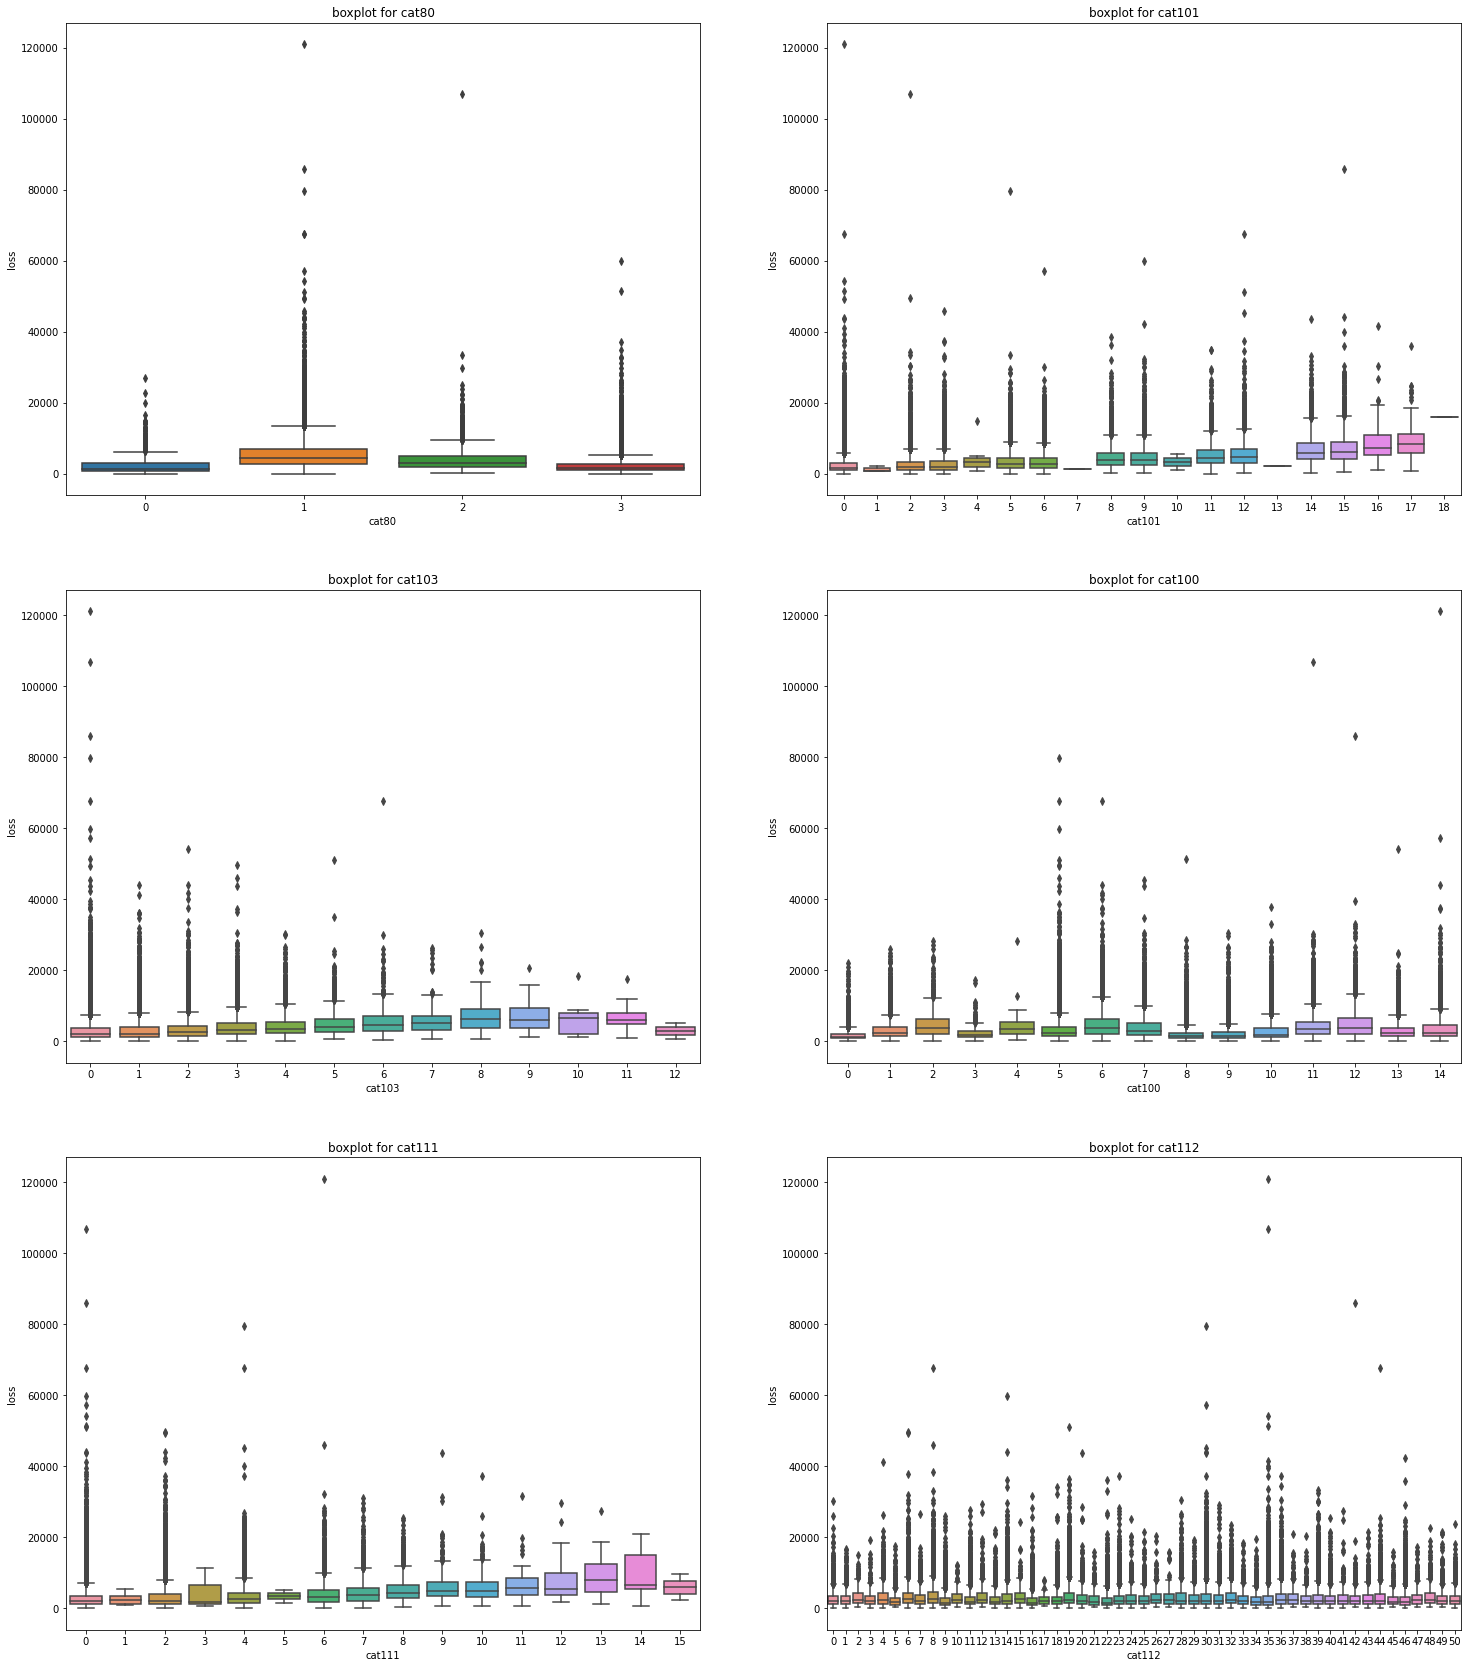

In [53]:
#CAT80
figure=plt.figure(figsize=(25,40))
axes1=figure.add_subplot(4,2,1) 
sns.boxplot(data=train_data,x='cat80',y='loss')
plt.title('boxplot for cat80')
#CAT101
axes2=figure.add_subplot(4,2,2) 
sns.boxplot(data=train_data,x='cat101',y='loss')
plt.title('boxplot for cat101')
#CAT103
axes3=figure.add_subplot(4,2,3) 
sns.boxplot(data=train_data,x='cat103',y='loss')
plt.title('boxplot for cat103')
#CAT100
axes4=figure.add_subplot(4,2,4) 
sns.boxplot(data=train_data,x='cat100',y='loss')
plt.title('boxplot for cat100')
#CAT111
axes5=figure.add_subplot(4,2,5) 
sns.boxplot(data=train_data,x='cat111',y='loss')
plt.title('boxplot for cat111')
#CAT112
axes6=figure.add_subplot(4,2,6) 
sns.boxplot(data=train_data,x='cat112',y='loss')
plt.title('boxplot for cat112')

#### Observations:

We can notice that some less rare levels have high variance.If we observe that the categeory 101 we can see that level 7,13,18 occur only once but its mean/median/loss around 1000,2000,15000 we can say that its an outlier

#### c.bivariate analysis on continuous features

#### 1.Scatter plot

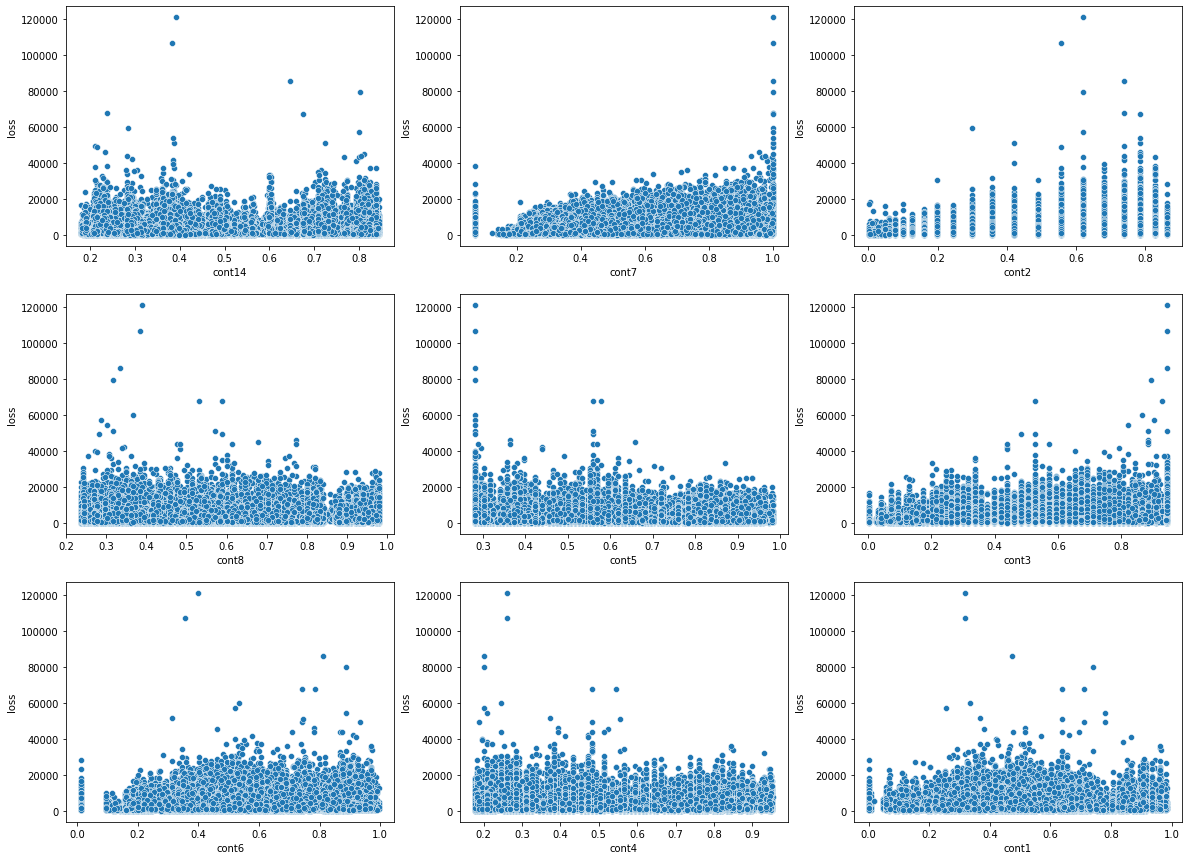

In [68]:
continuous_important_features=['cont14','cont7','cont2','cont8','cont5','cont3','cont6','cont4','cont1']
figure=plt.subplots(figsize=(20,15))
for m,n in enumerate(continuous_important_features):
    plt.subplot(3,3,m+1)
    sns.scatterplot(y=train_data['loss'],x=train_data[n])
    plt.ylabel('loss')
    plt.xlabel(n)

#### Observations:

we can observe that the all the points are lieing in between 0 to 1. Here also there are some outliers.

# Summary

Analyzing the Categeorical features how many unique features are there in a particular categeory most of the features have only 2 unique values.


Analyzing the every continuous feature by distributions.

applying polynomial transformations to every continuous features but here the polynomial transformations are very similar to our original distributions.So i will not do the polynomial transformations as feature engineering.

analysing the Loss feature here loss feature is log-normal distribution to convert into normal distribution i am applying log and adding some shift to our loss feature.

performed feature importance by applying RandomForestRegressor to do bi-variate analysis.

By applying countplot we can see how many unique levels are there in a categeory.